# Thesis Notebook Caro Pe

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## CSV files input to the Notebook

In [7]:
#Stuttgart Bikes Sets
stuttgart_dataset = "./stuttgart_bikes.csv"
df_stuttgart = pd.read_csv(stuttgart_dataset)

# df_stuttgart.shape: (10,12)

(10, 12)

## Munich Data Sets

#### Plotting Munich Data Sets Information

/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/89440042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muc_2023_arnulf['datum'] = pd.to_datetime(df_muc_2023_arnulf['datum'], format='%Y.%m.%d')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/89440042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muc_2023_arnulf_january['datum'] = df_muc_2023_arnulf_january['datum'].dt.strftime('%d.%m')


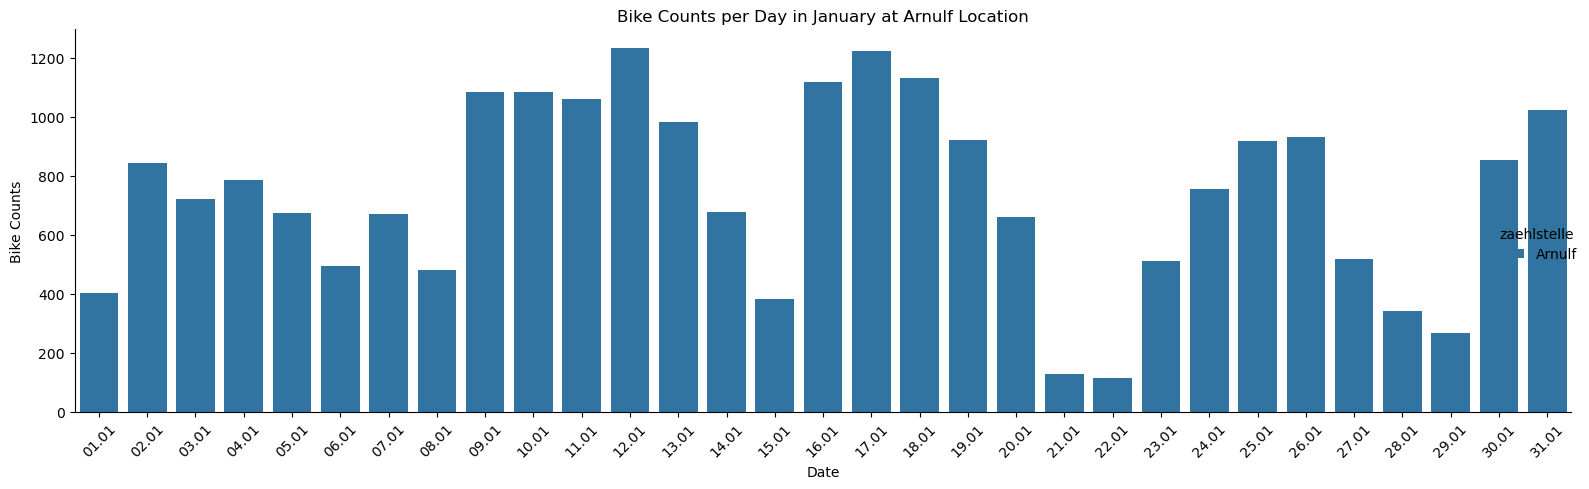

In [153]:
# I want to plot the count of bikes in all locations of Munich on 2019 as a bar plot
# In the same visual I want to plot the min and max temperatures with a normal line plot

df_muc_2023['datum'] = pd.to_datetime(df_muc_2023['datum'])

df_muc_2023_arnulf = df_muc_2023[df_muc_2023['zaehlstelle'] == 'Arnulf']

# df_muc_2023_arnulf['datum'] = df_muc_2023_arnulf['datum'].dt.strftime('%d.%m')
# Convert the "datum" column to datetime format
df_muc_2023_arnulf['datum'] = pd.to_datetime(df_muc_2023_arnulf['datum'], format='%Y.%m.%d')

df_muc_2023_arnulf_january = df_muc_2023_arnulf[df_muc_2023_arnulf['datum'].dt.month == 1]
df_muc_2023_arnulf_january['datum'] = df_muc_2023_arnulf_january['datum'].dt.strftime('%d.%m')

df_muc_2023_arnulf_january.shape

sns.catplot(data=df_muc_2023_arnulf_january, x='datum', y='gesamt', hue='zaehlstelle', kind='bar', aspect=3)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Bike Counts per Day in January at Arnulf Location')
plt.xlabel('Date')
plt.ylabel('Bike Counts')
plt.tight_layout()
plt.show()

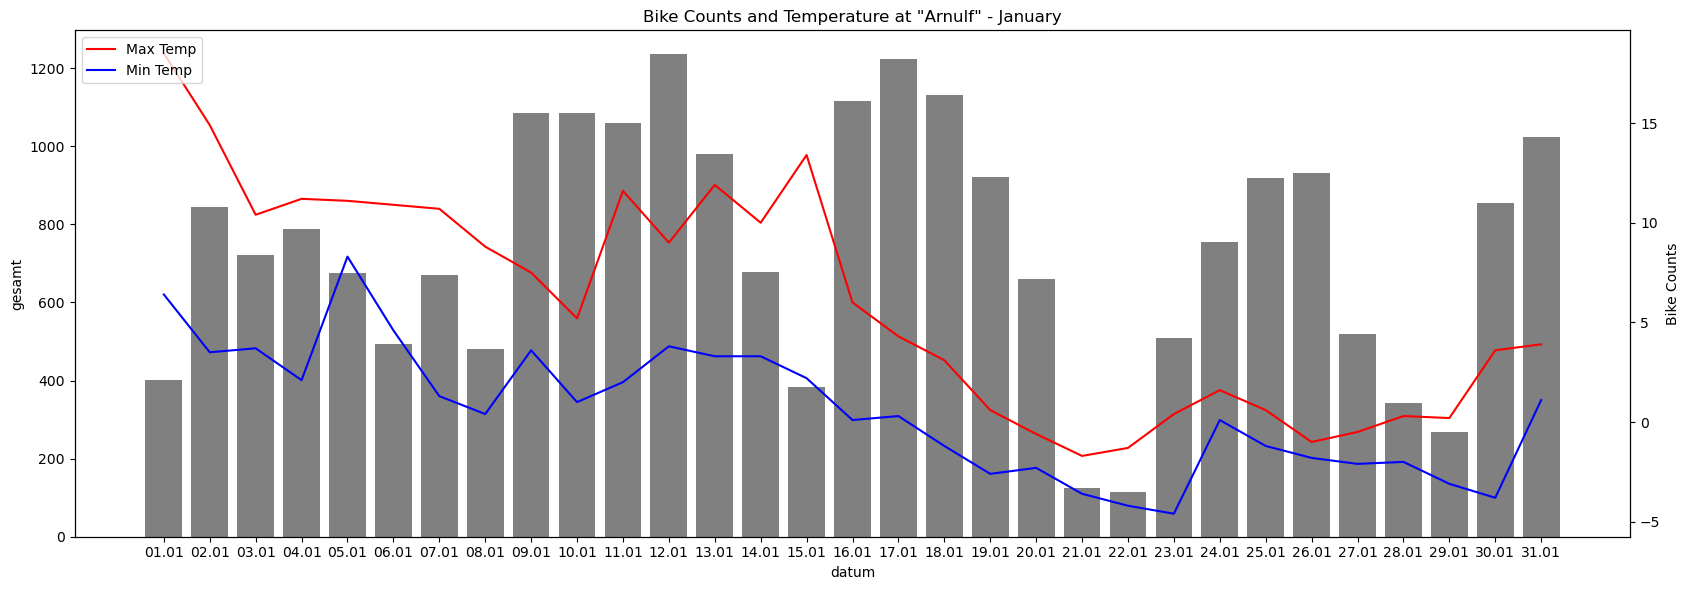

In [154]:
# Plotting
plt.figure(figsize=(17, 6))

# Plot bike counts as a bar plot in grey color
sns.barplot(data=df_muc_2023_arnulf_january, x='datum', y='gesamt', color='grey')

# Create a secondary y-axis for temperature
ax2 = plt.gca().twinx()

# Plot max temperature as a line plot in red color on the secondary y-axis
ax2.plot(df_muc_2023_arnulf_january['datum'], df_muc_2023_arnulf_january['max.temp'], color='red', label='Max Temp')
ax2.set_ylabel('Max Temp (°C)')

# Plot min temperature as a line plot in blue color on the secondary y-axis
ax2.plot(df_muc_2023_arnulf_january['datum'], df_muc_2023_arnulf_january['min.temp'], color='blue', label='Min Temp')
ax2.set_ylabel('Temperature (°C)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' parameter sets horizontal alignment to 'right'

# Add title and labels
plt.title('Bike Counts and Temperature at "Arnulf" - January')
plt.xlabel('Date (DD.MM)')
plt.ylabel('Bike Counts')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [155]:
# ANumber of Data Capture Locations for Munich in 2023
num_locations = df_muc_2023['zaehlstelle'].nunique()
print("Number of different locations:", num_locations)


Number of different locations: 6


In [156]:
# Assuming df_muc_2023 is your DataFrame containing the data for Munich in 2023
# Get unique locations
unique_locations = df_muc_2023['zaehlstelle'].unique()
print(unique_locations)

['Arnulf' 'Kreuther' 'Olympia' 'Hirsch' 'Margareten' 'Erhardt']


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2306596970.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2306596970.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/2306596970.py:20: SettingWithCopyWarning: 
A value is trying to be

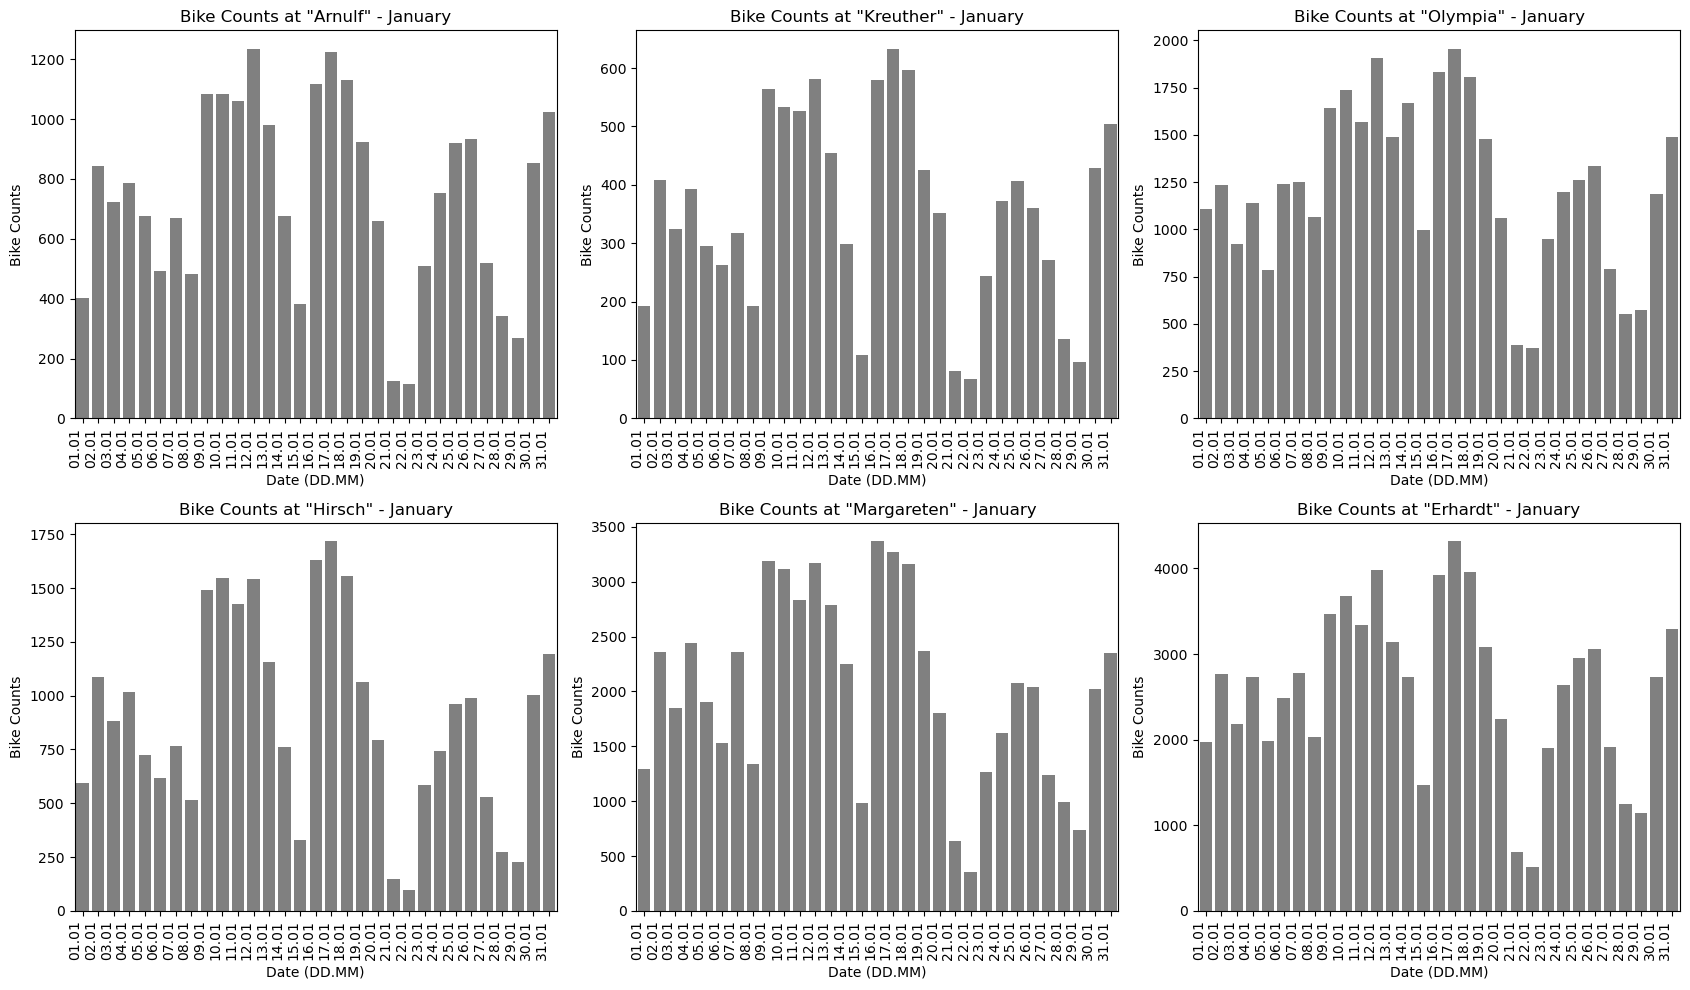

In [157]:
# Assuming df_muc_2023 is your DataFrame containing the data for Munich in 2023
# Assuming num_locations contains the number of unique locations
# Assuming unique_locations contains the list of unique locations

# Create a figure and six subplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_muc_2023[df_muc_2023['zaehlstelle'] == location]
    
    # Filter the DataFrame for January
    df_january = df_location[df_location['datum'].dt.month == 1]

    # Extract day and month from the "datum" column and format it as DD.MM
    df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_january, x='datum', y='gesamt', color='grey')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Add title and labels
    plt.title(f'Bike Counts at "{location}" - January')
    plt.xlabel('Date (DD.MM)')
    plt.ylabel('Bike Counts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/4119946438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')


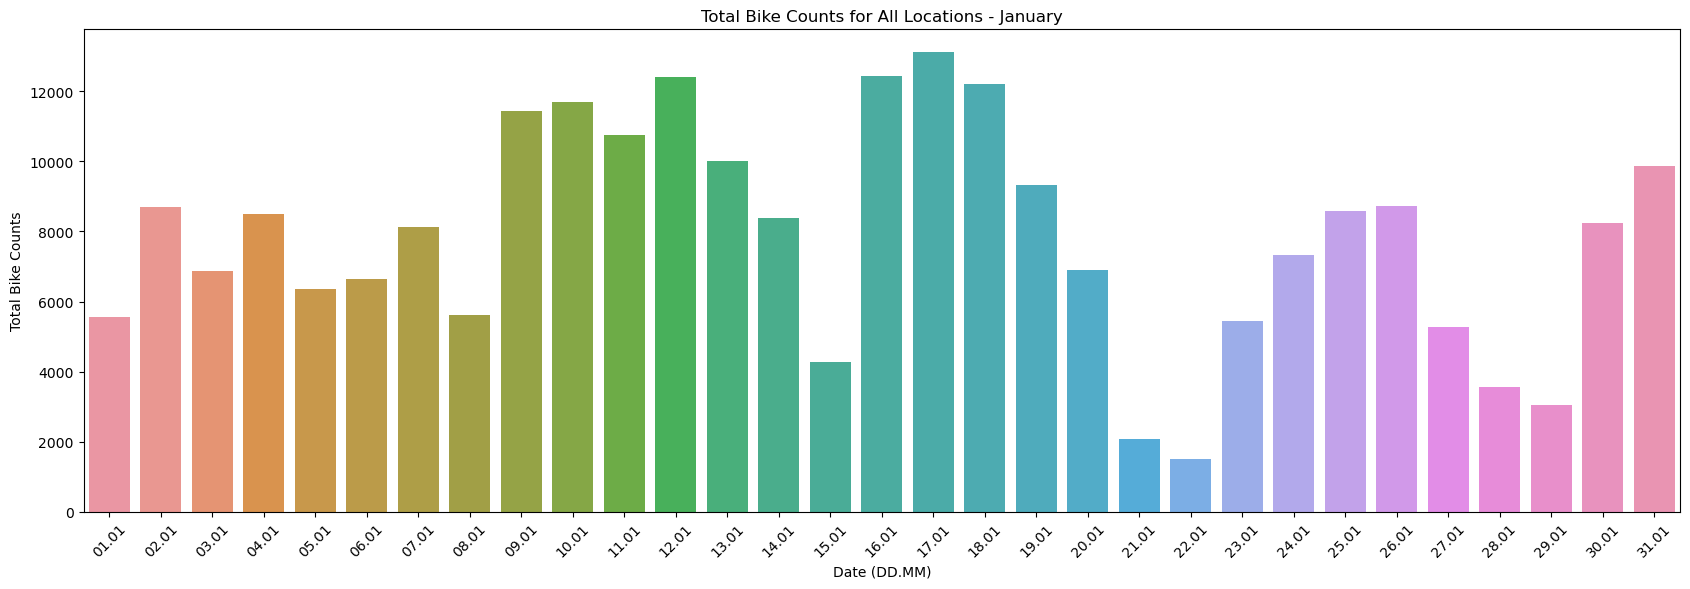

In [158]:
# Lets try to put them all together per month:

df_january = df_muc_2023[df_muc_2023['datum'].dt.month == 1]
df_january['datum'] = df_january['datum'].dt.strftime('%d.%m')

df_muc_01_2023_total = df_january.groupby('datum')['gesamt'].sum().reset_index()

plt.figure(figsize=(17,6))

sns.barplot(data=df_muc_01_2023_total, x='datum', y='gesamt')

plt.xticks(rotation=45)

plt.title('Total Bike Counts for All Locations - January')
plt.xlabel('Date (DD.MM)')
plt.ylabel('Total Bike Counts')

# Show plot
plt.tight_layout()
plt.show()

/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/141436427.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['datum'] = df_month['datum'].dt.strftime('%d.%m')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/141436427.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['datum'] = df_month['datum'].dt.strftime('%d.%m')
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_7259/141436427.py:13: SettingWithCopyWarning: 
A value is trying to be set on a c

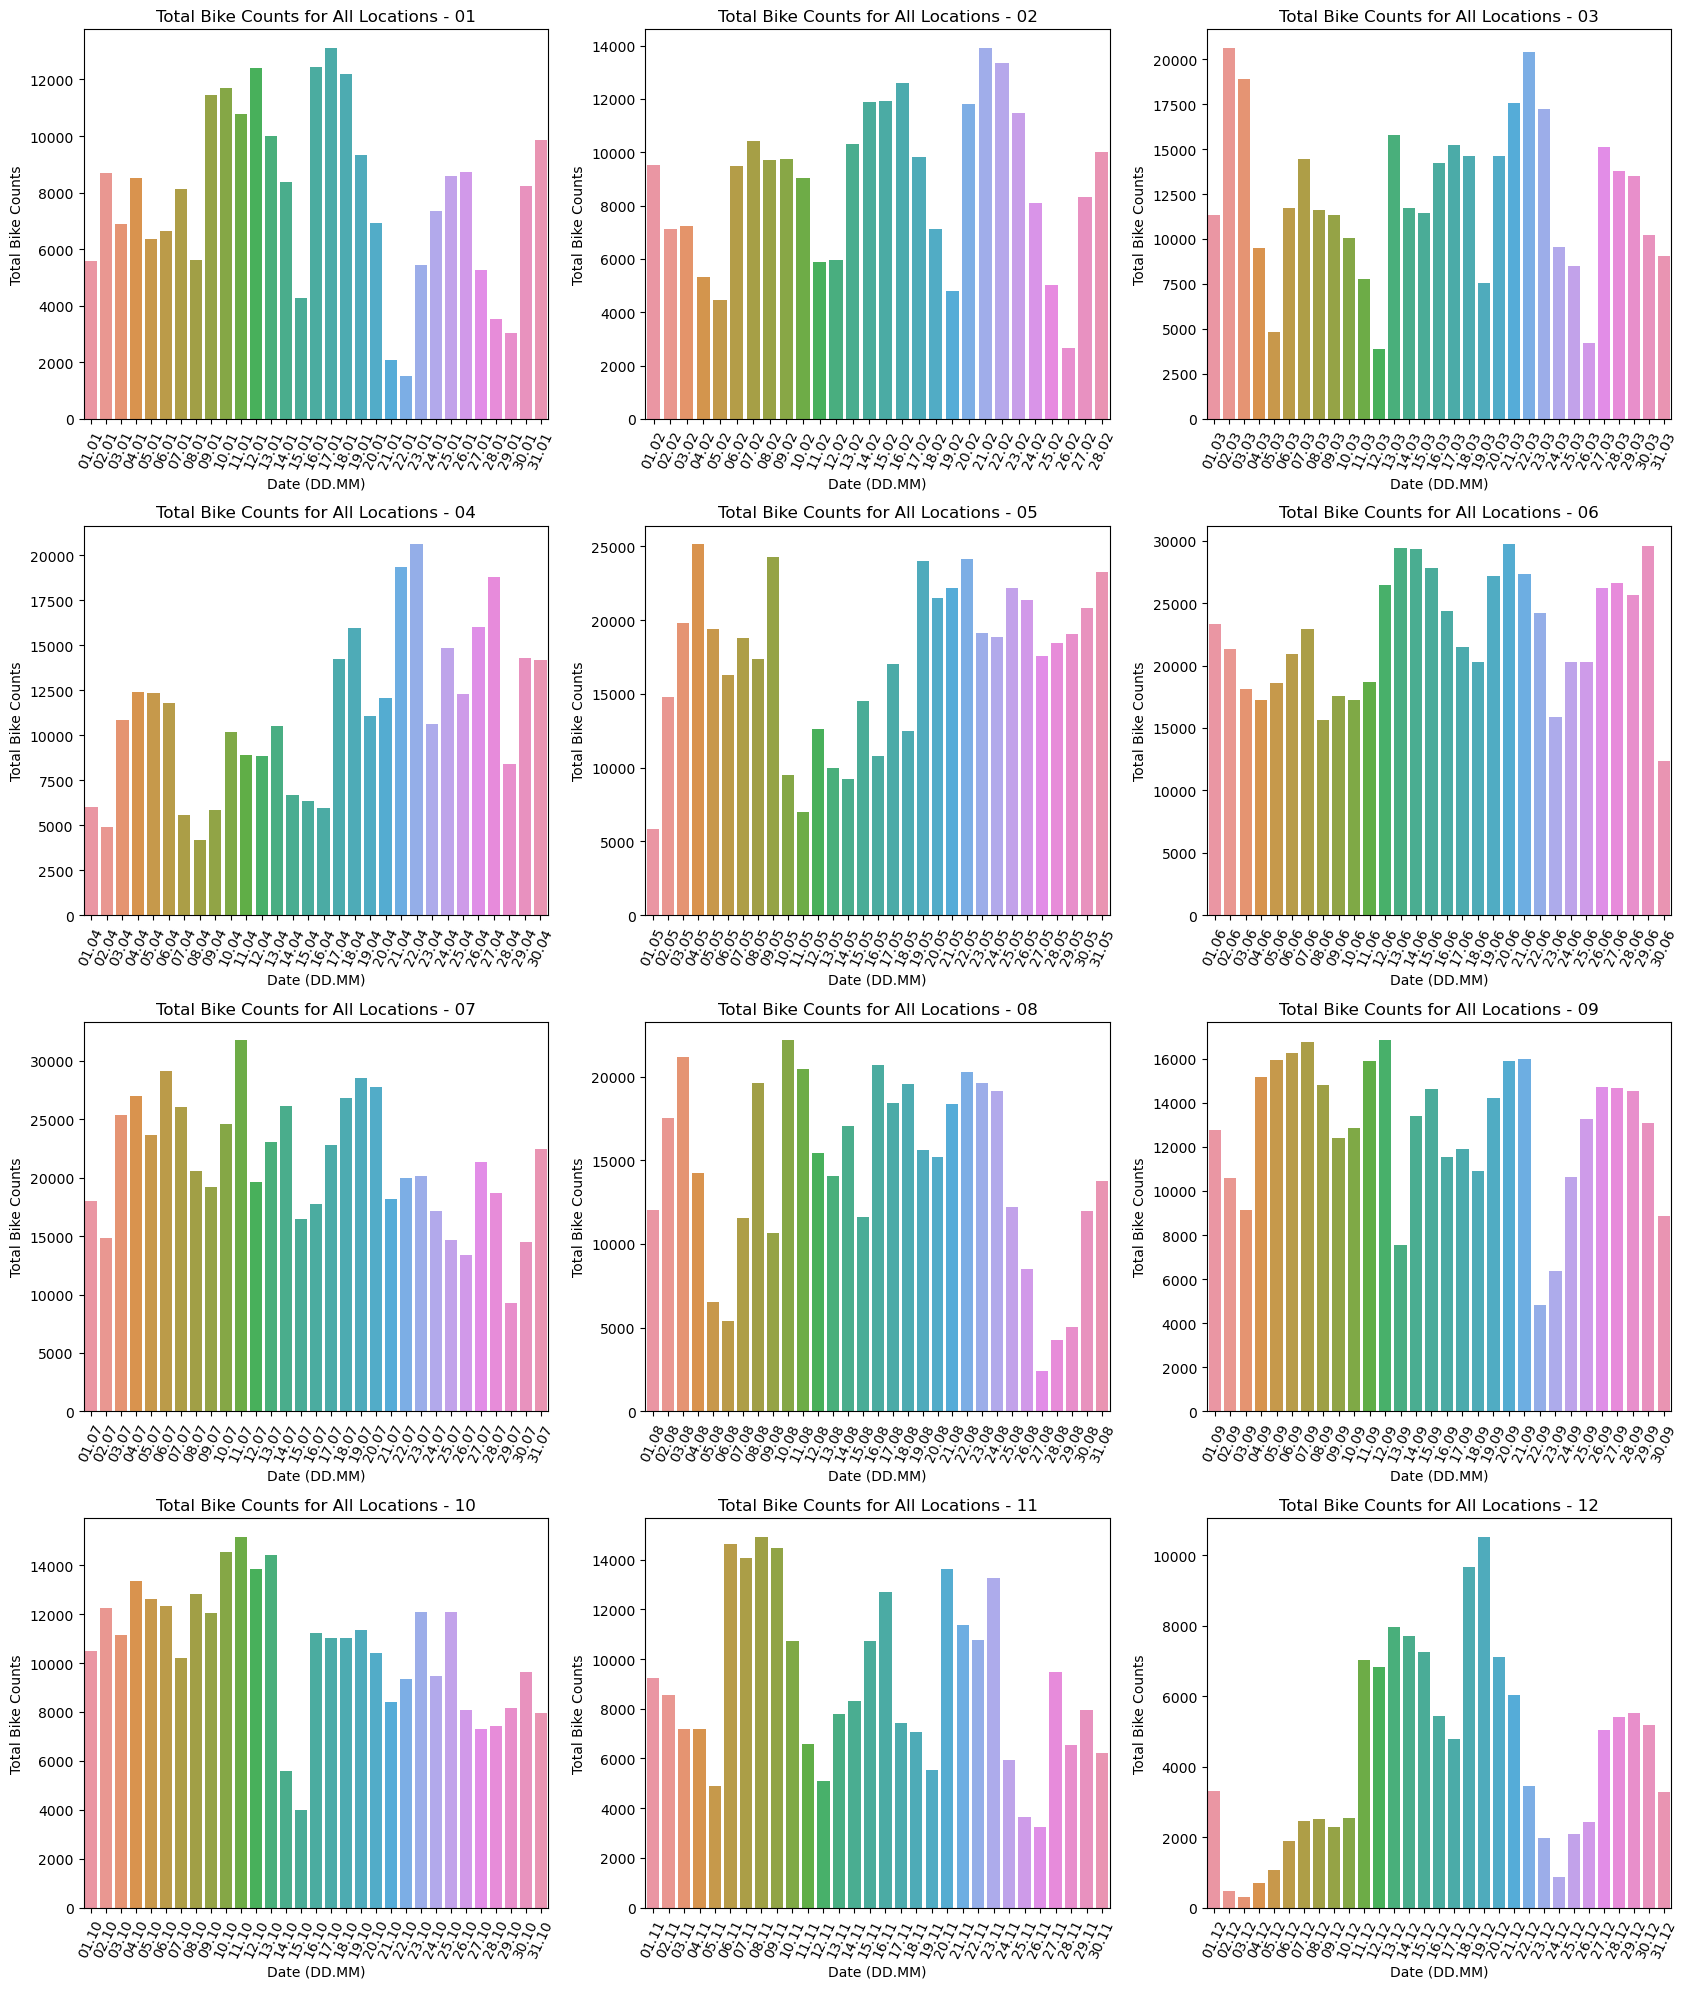

In [159]:
# Create a figure and 12 subplots (arranged in 4 rows and 3 columns)
fig, axs = plt.subplots(4, 3, figsize=(17, 20))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each month
for i, month in enumerate(range(1, 13)):
    # Filter the DataFrame for the current month
    df_month = df_muc_2023[df_muc_2023['datum'].dt.month == month]

    # Extract day and month from the "datum" column and format it as DD.MM
    df_month['datum'] = df_month['datum'].dt.strftime('%d.%m')

    # Group by date and sum the bike counts for all locations
    df_total = df_month.groupby('datum')['gesamt'].sum().reset_index()

    # Plotting
    plt.sca(axs[i])  # Set the current subplot

    sns.barplot(data=df_total, x='datum', y='gesamt')

    plt.xticks(rotation=65)  # Rotate x-axis labels for better readability

    plt.title(f'Total Bike Counts for All Locations - {df_month.iloc[0]["datum"].split(".")[1]}')
    plt.xlabel('Date (DD.MM)')
    plt.ylabel('Total Bike Counts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


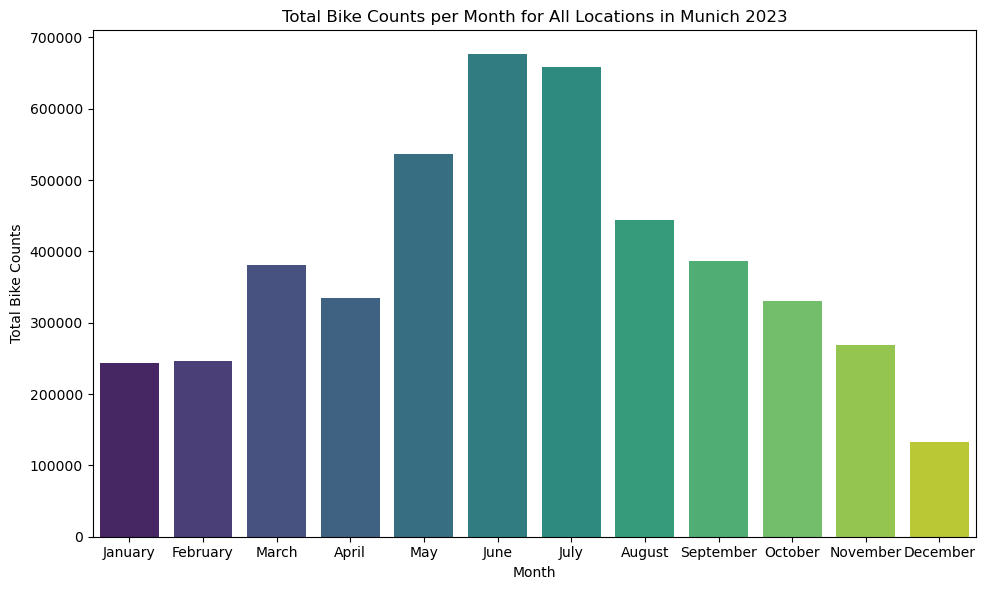

In [160]:
# Group by month and sum the bike counts for all locations
df_monthly_total = df_muc_2023.groupby(df_muc_2023['datum'].dt.month)['gesamt'].sum().reset_index()
df_monthly_total['month'] = df_monthly_total['datum'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(data=df_monthly_total, x='month', y='gesamt', palette='viridis')

plt.title('Total Bike Counts per Month for All Locations in Munich 2023')
plt.xlabel('Month')
plt.ylabel('Total Bike Counts')

# Show plot
plt.tight_layout()
plt.show()


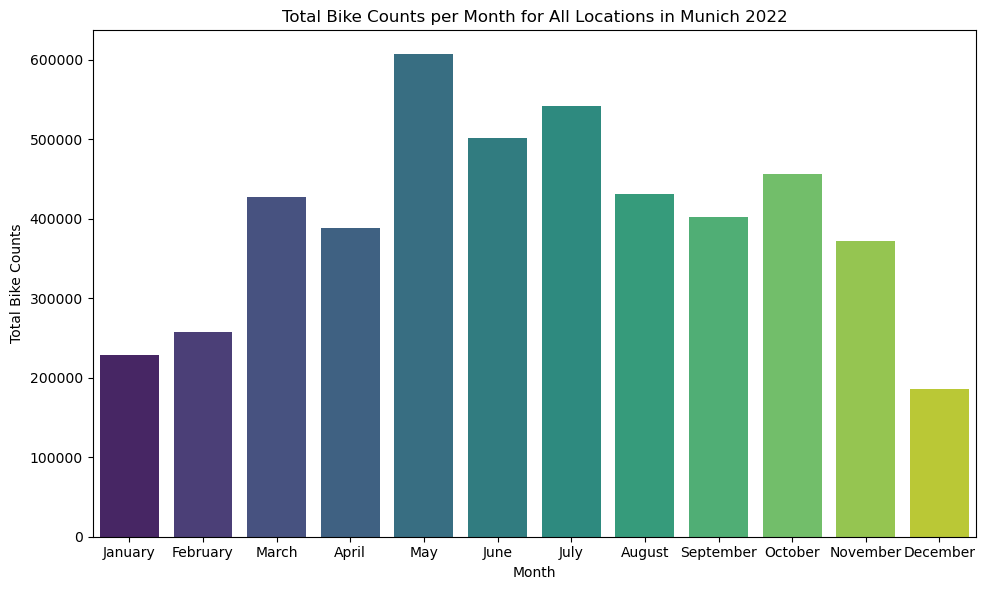

In [161]:
# Convert the "datum" column to datetime format
df_muc_2022['datum'] = pd.to_datetime(df_muc_2022['datum'], format='%Y-%m-%d')

# Group by month and sum the bike counts for all locations
df_monthly_total_2022 = df_muc_2022.groupby(df_muc_2022['datum'].dt.month)['gesamt'].sum().reset_index()
df_monthly_total_2022['month'] = df_monthly_total_2022['datum'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(data=df_monthly_total_2022, x='month', y='gesamt', palette='viridis')

plt.title('Total Bike Counts per Month for All Locations in Munich 2022')
plt.xlabel('Month')
plt.ylabel('Total Bike Counts')

# Show plot
plt.tight_layout()
plt.show()

    datum    gesamt      month
0       1  247023.0    January
1       2  211646.0   February
2       3  279151.0      March
3       4  451776.0      April
4       5  474438.0        May
5       6  459800.0       June
6       7  642056.0       July
7       8  500630.0     August
8       9  536386.0  September
9      10  413294.0    October
10     11  328549.0   November
11     12  206711.0   December


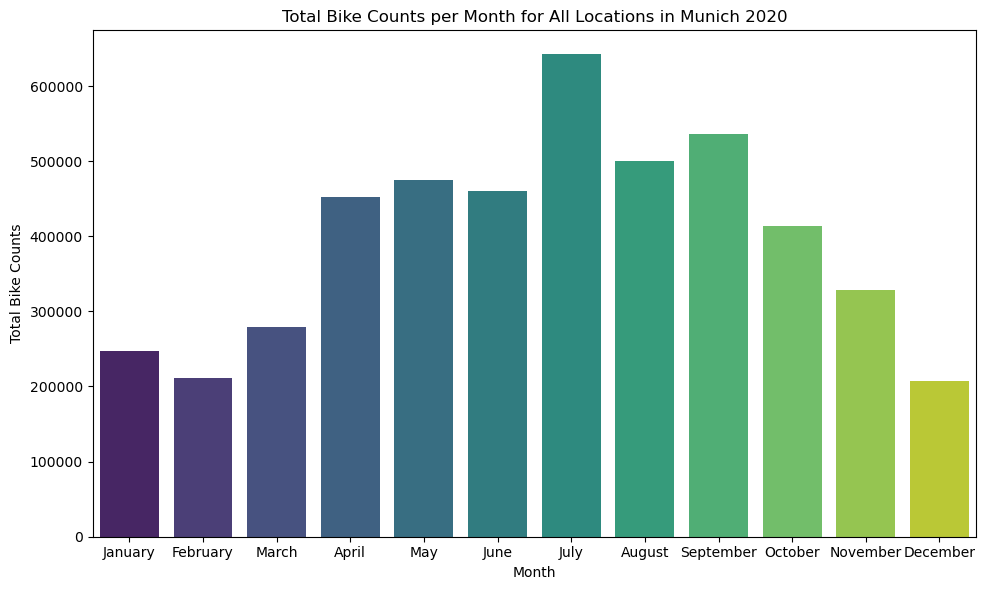

In [162]:
# Convert the "datum" column to datetime format
df_muc_2020['datum'] = pd.to_datetime(df_muc_2020['datum'], format='%Y-%m-%d')

# Group by month and sum the bike counts for all locations
df_monthly_total_2020 = df_muc_2020.groupby(df_muc_2020['datum'].dt.month)['gesamt'].sum().reset_index()
df_monthly_total_2020['month'] = df_monthly_total_2020['datum'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
print(df_monthly_total_2020)

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(data=df_monthly_total_2020, x='month', y='gesamt', palette='viridis')

plt.title('Total Bike Counts per Month for All Locations in Munich 2020')
plt.xlabel('Month')
plt.ylabel('Total Bike Counts')

# Show plot
plt.tight_layout()
plt.show()

    datum    gesamt      month
0       1  114481.0    January
1       2  180573.0   February
2       3  258042.0      March
3       4  346484.0      April
4       5  371294.0        May
5       6  476452.0       June
6       7  537221.0       July
7       8  447511.0     August
8       9  414706.0  September
9      10  391301.0    October
10     11  283571.0   November
11     12  218059.0   December


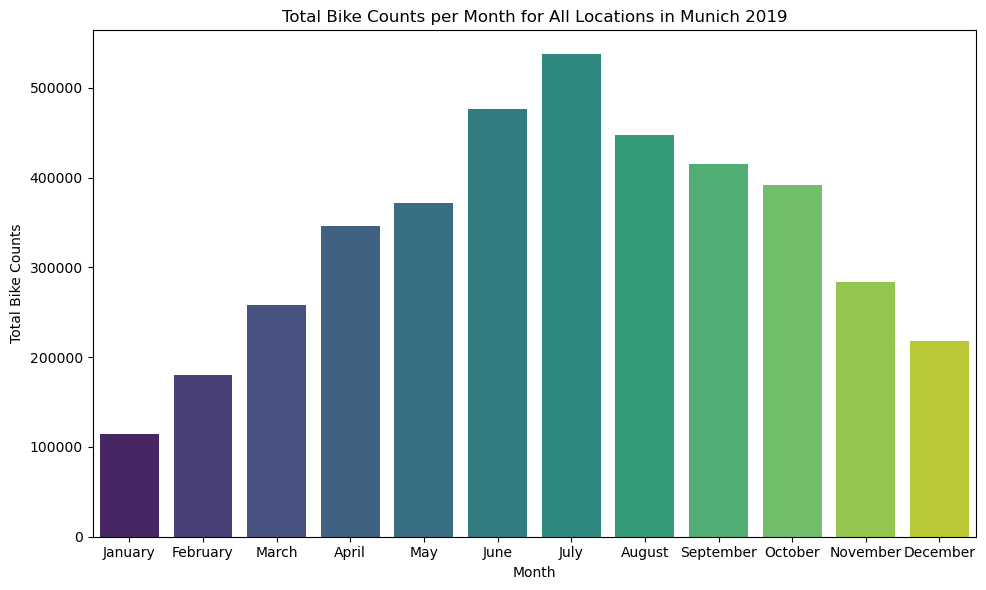

In [163]:
# Convert the "datum" column to datetime format
df_muc_2019['datum'] = pd.to_datetime(df_muc_2019['datum'], format='%Y-%m-%d')

# Group by month and sum the bike counts for all locations
df_monthly_total_2019 = df_muc_2019.groupby(df_muc_2019['datum'].dt.month)['gesamt'].sum().reset_index()
df_monthly_total_2019['month'] = df_monthly_total_2019['datum'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
print(df_monthly_total_2019)

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(data=df_monthly_total_2019, x='month', y='gesamt', palette='viridis')

plt.title('Total Bike Counts per Month for All Locations in Munich 2019')
plt.xlabel('Month')
plt.ylabel('Total Bike Counts')

# Show plot
plt.tight_layout()
plt.show()

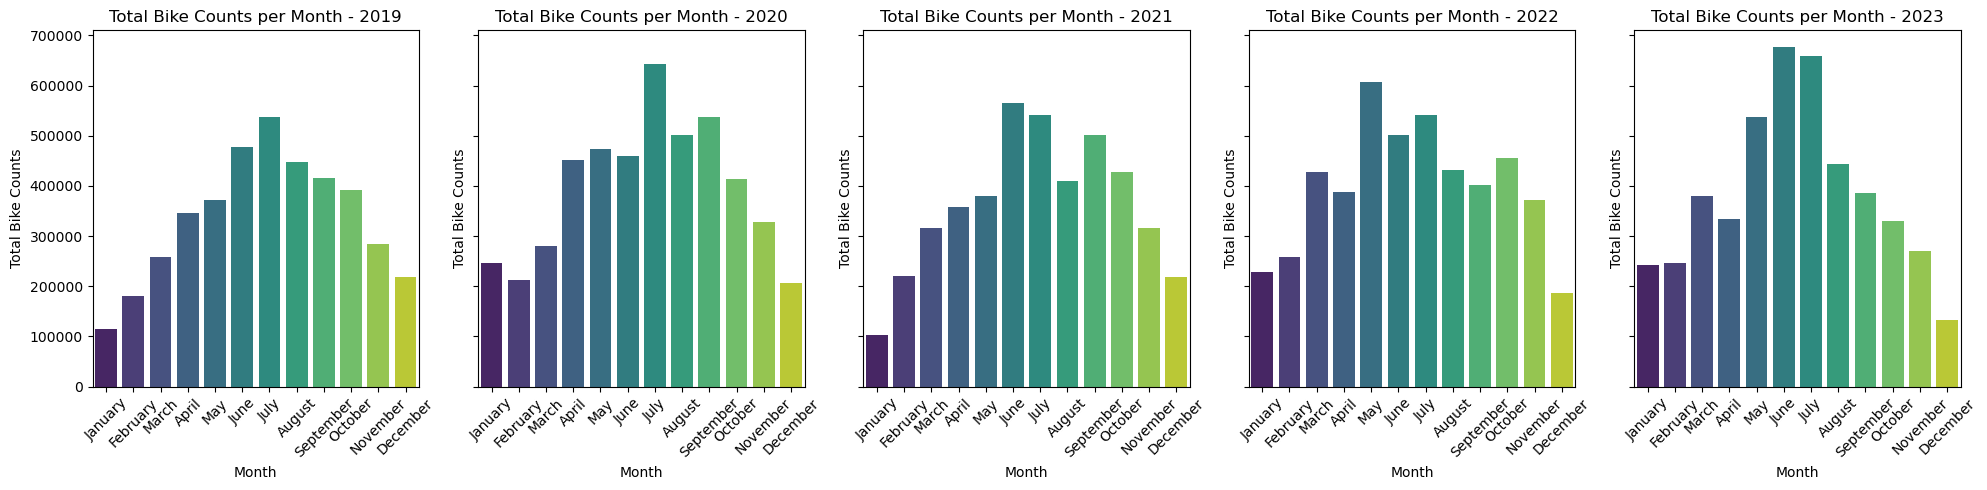

In [164]:
# now trying to use the combined data frame

## !!! Due to the pre-processing I have realized that there is a problem with the datum column: 
## for most of the years, the date format is YYYY-MM-DD but for one it is YYYY.MM.DD, so instead of "-" it uses "."
## To fix this we can use the str.replace() method

# Replace '.' with '-' in the 'datum' column
df_munich['datum'] = df_munich['datum'].str.replace('.', '-')

# Convert the "datum" column to datetime format
df_munich['datum'] = pd.to_datetime(df_munich['datum'], format='%Y-%m-%d')

# Extract year from the "datum" column
df_munich['year'] = df_munich['datum'].dt.year

# Group by year and month and sum the bike counts for all locations
df_yearly_total = df_munich.groupby([df_munich['year'], df_munich['datum'].dt.month])['gesamt'].sum().reset_index()
df_yearly_total['month'] = df_yearly_total['datum'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Create subplots for each year
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Iterate over each year
for i, year in enumerate(df_yearly_total['year'].unique()):
    # Filter the DataFrame for the current year
    df_year = df_yearly_total[df_yearly_total['year'] == year]

    # Plotting
    sns.barplot(data=df_year, x='month', y='gesamt', ax=axs[i], palette='viridis')

    axs[i].set_title(f'Total Bike Counts per Month - {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Bike Counts')
    axs[i].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [174]:
print(df_yearly_total)

    year  datum    gesamt      month
0   2019      1  114481.0    January
1   2019      2  180573.0   February
2   2019      3  258042.0      March
3   2019      4  346484.0      April
4   2019      5  371294.0        May
5   2019      6  476452.0       June
6   2019      7  537221.0       July
7   2019      8  447511.0     August
8   2019      9  414706.0  September
9   2019     10  391301.0    October
10  2019     11  283571.0   November
11  2019     12  218059.0   December
12  2020      1  247023.0    January
13  2020      2  211646.0   February
14  2020      3  279151.0      March
15  2020      4  451776.0      April
16  2020      5  474438.0        May
17  2020      6  459800.0       June
18  2020      7  642056.0       July
19  2020      8  500630.0     August
20  2020      9  536386.0  September
21  2020     10  413294.0    October
22  2020     11  328549.0   November
23  2020     12  206711.0   December
24  2021      1  101859.0    January
25  2021      2  221059.0   February
2